

























# Employee Salary Prediction: Linear Rregression

In [2]:
# Import Packages/Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read data file/ csv file:

sal_data = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
sal_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
#Number of rows and columns:
sal_data.shape

(375, 6)

In [5]:
#List of columns:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [6]:
#Rename Columns:
sal_data.columns = ['Age','Gender','Degree','Job_Title','Experience_years','Salary']

In [7]:
#Column Datatype:
sal_data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object

In [8]:
#Information of Dataset:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [9]:
#Duplicate Records in data:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [10]:
#dropping duplicates from the data:
sal_data1 = sal_data.drop_duplicates(keep = 'first')

In [11]:
#Missing/null value in each columns:
sal_data1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64

In [12]:
#dropping missing values from data:
sal_data1.dropna(how = 'any', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6704\2588655052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how = 'any', inplace=True)


In [13]:
sal_data1.shape

(324, 6)

# Data Exploration and Vaisualization:

In [14]:
#Statistics of Numerical Columns:

sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [15]:
#Correlation matrix among Numeriical Features:

corr = sal_data1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

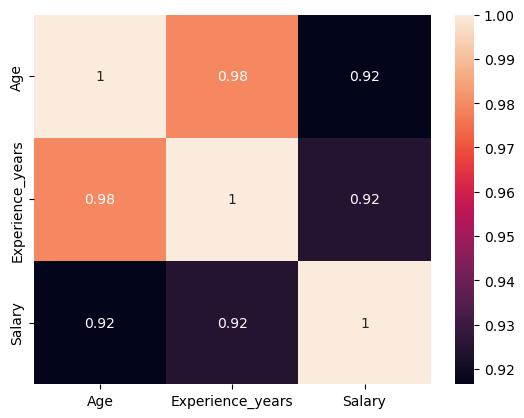

In [16]:
sns.heatmap(corr, annot = True)

# Data Visualization - Bar Chart, Box plot, Histogram

In [17]:
sal_data1['Degree'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Degree, dtype: int64

<Axes: >

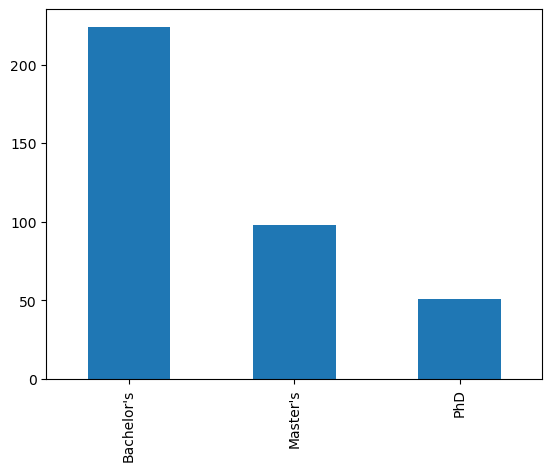

In [18]:
sal_data['Degree'].value_counts().plot(kind = 'bar')

In [19]:
sal_data1['Job_Title'].value_counts()

Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job_Title, Length: 174, dtype: int64

<Axes: >

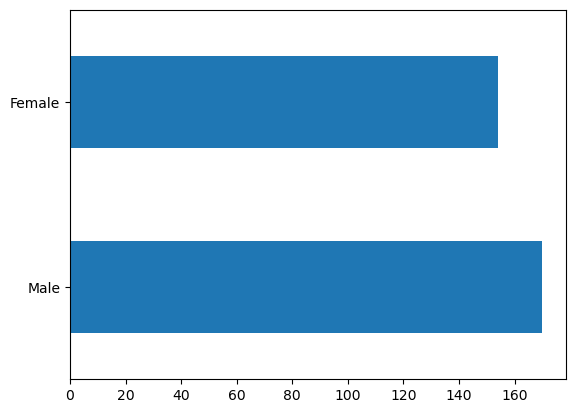

In [20]:
sal_data1['Gender'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Frequency'>

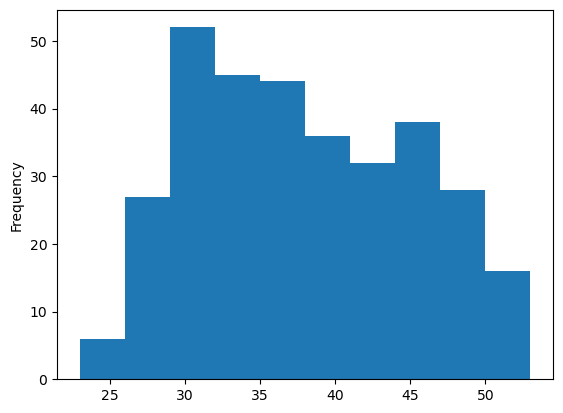

In [21]:
sal_data1.Age.plot(kind = 'hist')

<Axes: >

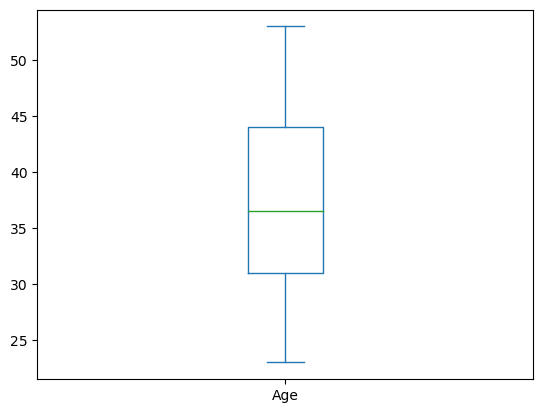

In [22]:
sal_data1.Age.plot(kind = 'box')

<Axes: >

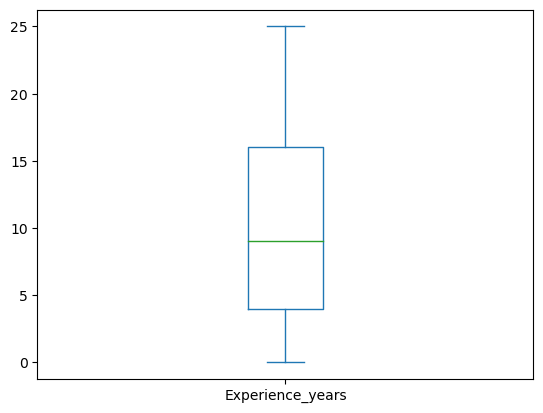

In [23]:
sal_data1.Experience_years.plot(kind = 'box')

<Axes: >

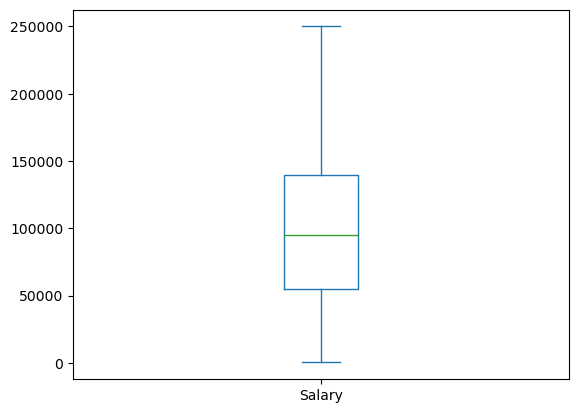

In [24]:
sal_data1.Salary.plot(kind = 'box')

<Axes: ylabel='Frequency'>

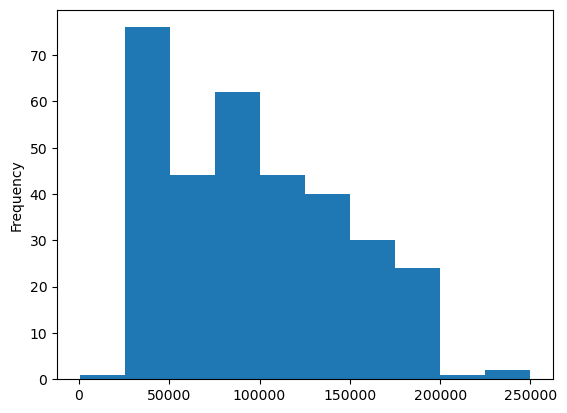

In [25]:
sal_data1.Salary.plot(kind = 'hist')

In [26]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Feature Engineering:

In [27]:
#label Encoding:

from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [28]:
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6704\1017469824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])


In [29]:
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6704\446779904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])


In [30]:
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6704\840262182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])


# Data after label encoding:

In [31]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [33]:
#Feature Scrolling:

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


In [34]:
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_years']])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6704\2823734138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6704\2823734138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_years']])


# Data After Scalling:

In [35]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


# Dependent and Independent features:

In [36]:
x = sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_years_scaled']]
y = sal_data1['Salary']

In [37]:
x.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


# Spitting the data into Training and Testing:

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [40]:
x_train.shape, y_train.shape #80%

((259, 5), (259,))

In [41]:
x_test.shape, y_test.shape #20%

((65, 5), (65,))

# Model Development:

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
Linear_regression_model = LinearRegression()

# Model training:

In [44]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

# Model Predections:

In [45]:
y_pred_lr= Linear_regression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [46]:
df = pd.DataFrame({'y_Actual' : y_test, 'y_Predicted': y_pred_lr})
df['Error']= df['y_Actual']-df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


In [47]:
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

10570.786401136176

# Model Evaluation:

In [48]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model Accuracy:

In [49]:
r2_score(y_test, y_pred_lr)

0.8911231066517089

In [50]:
print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100}%')

Accuracy of the model = 89.11%


# Mean Absolute Error:

In [51]:
round(mean_absolute_error(y_test, y_pred_lr),2)

10570.79

In [52]:
print(f"Mean Absolute Error = {round(mean_absolute_error(y_test, y_pred_lr),2)}")

Mean Absolute Error = 10570.79


# Mean Squared Error:

In [53]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse

205754135.72

In [54]:
print(f"Mean Squared Error = {round(mean_squared_error(y_test, y_pred_lr),2)}")

Mean Squared Error = 205754135.72


# Root Mean Squared Error:

In [55]:
print('Root Mean Squared Error (RMSE) = ', mse**(0.5))

Root Mean Squared Error (RMSE) =  14344.132449193294


# Cofficients:

In [56]:
Linear_regression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

# Intercepts:

In [57]:
Linear_regression_model.intercept_

86001.49320553175

# Customise Predictions:

In [58]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148
